## Network Science 
### Task 2

### Q1
Analyze degree distribution of Gnutella Network

In [2]:
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import requests


In [3]:
# Open a file called "data.txt" for reading
with open('C:\\Users\\ElifB\\Desktop\\568_PROJE\\p2p-Gnutella08.txt', 'r') as file:
    # Read the contents of the file into a variable
    file_contents = file.read()


In [4]:
gnutella_graph = nx.read_edgelist('C:\\Users\\ElifB\\Desktop\\568_PROJE\\p2p-Gnutella08.txt', comments='#', create_using=nx.DiGraph(), nodetype = int)
nx.nodes(gnutella_graph)
nx.edges(gnutella_graph)

OutEdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (3, 703), (3, 826), (3, 1097), (3, 1287), (3, 1591), (3, 1895), (3, 1896), (3, 1897), (3, 1898), (3, 1899), (4, 144), (4, 258), (4, 491), (4, 1021), (4, 1418), (4, 1669), (4, 1900), (4, 1901), (4, 1902), (4, 1903), (5, 121), (5, 127), (5, 128), (5, 179), (5, 247), (5, 249), (5, 264), (5, 353), (5, 424), (5, 426), (7, 145), (7, 176), (7, 177), (7, 353), (7, 753), (7, 754), (7, 762), (7, 2064), (7, 3002), (8, 520), (8, 665), (8, 852), (8, 1394), (8, 1786), (8, 1842), (8, 1904), (8, 1905), (8, 1906), (8, 1907), (9, 124), (9, 147), (9, 177), (9, 246), (9, 247), (9, 248), (9, 249), (9, 250), (9, 251), (9, 252), (703, 898), (703, 1581), (703, 1620), (703, 2634), (703, 2635), (703, 2636), (703, 2637), (703, 2638), (703, 2639), (703, 2640), (1287, 38), (1287, 331), (1287, 626), (1287, 1945), (1287, 2690), (1287, 3137), (1287, 3138), (1287, 3139), (1287, 3140), (1287, 3141), (1895, 1860), (1896, 1118),

In [5]:
num_nodes = len(list(nx.nodes(gnutella_graph)))
print("Number of nodes: ", num_nodes)
num_edges = len(list(nx.edges(gnutella_graph)))
print("Number of edges: ", num_edges)

Number of nodes:  6301
Number of edges:  20777


In [6]:
out_degrees = dict(gnutella_graph.out_degree()) # dictionary node:degree
in_degrees = dict(gnutella_graph.in_degree())
# filtering nodes outdegree values with outdegree > 0
pos_out_degree_vals = list(filter(lambda val: val > 0, out_degrees.values()))
pos_in_degree_vals = list(filter(lambda val: val > 0, in_degrees.values()))
pos_total_degree_vals = pos_out_degree_vals + pos_in_degree_vals
# getting unique and sorted outdegree values
uq_pos_out_degree_vals = sorted(set(pos_out_degree_vals))
uq_pos_in_degree_vals = sorted(set(pos_in_degree_vals))
uq_pos_total_degree_vals = uq_pos_out_degree_vals + uq_pos_in_degree_vals
# counting frequency of each outdegree values
total_hist = [pos_total_degree_vals.count(x) for x in uq_pos_total_degree_vals]

print(max(pos_total_degree_vals))

91


In [9]:
print("Maximum degree: ", max(pos_total_degree_vals))

Maximum degree:  91


In [8]:
avg_degree = sum(dict(gnutella_graph.degree()).values()) / num_nodes
print("Average degree: ", avg_degree)

Average degree:  6.594826218060625


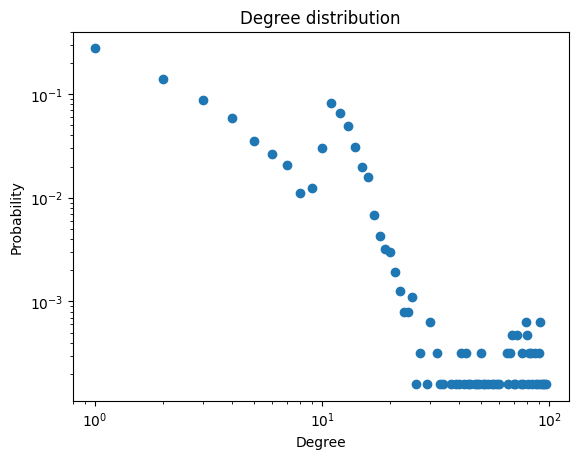

In [9]:
# Get the degree distribution of the graph
degree_sequence = sorted([d for n, d in gnutella_graph.degree()], reverse=True)
degree_count = nx.degree_histogram(gnutella_graph)

# Calculate the probability distribution function
p_k = [float(i)/sum(degree_count) for i in degree_count]

# Plot the degree distribution and the probability distribution function
plt.loglog(range(len(degree_count)), p_k, 'o')
plt.title("Degree distribution")
plt.xlabel("Degree")
plt.ylabel("Probability")
plt.show()

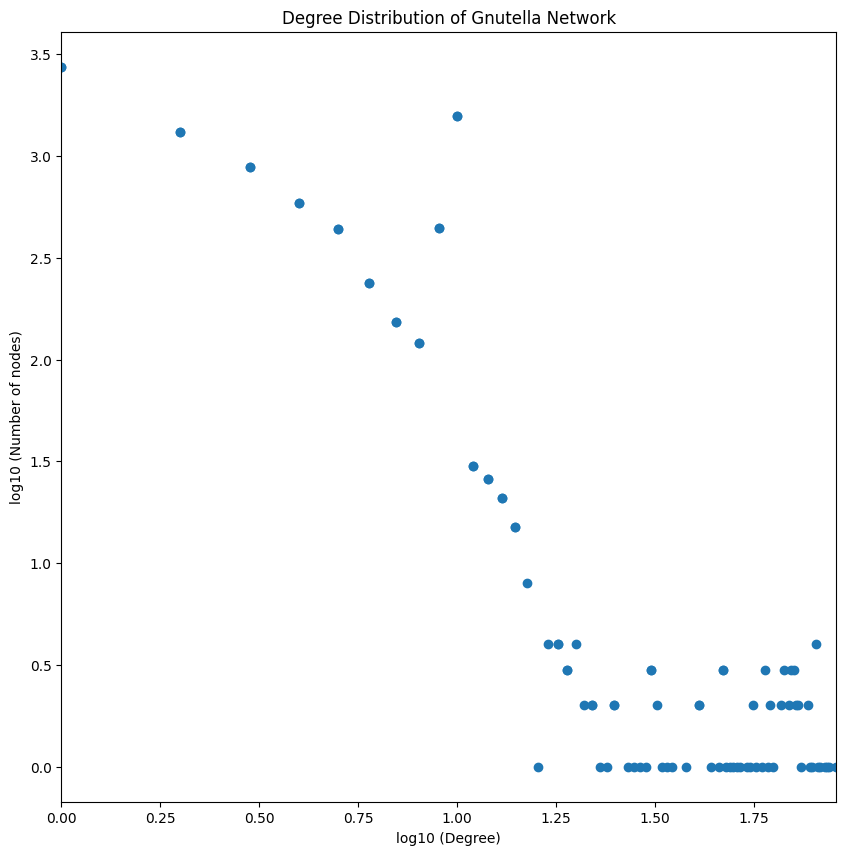

In [8]:
x = np.asarray(uq_pos_total_degree_vals, dtype = float)
y = np.asarray(total_hist, dtype = float)

logx = np.log10(x)
logy = np.log10(y)

plt.figure(figsize=(10,10))
plt.xlim(min(logx), max(logx))
plt.xlabel('log10 (Degree)')
plt.ylabel('log10 (Number of nodes)')
plt.title('Degree Distribution of Gnutella Network')
out_degree_dist = plt.plot(logx, logy, 'o')

### Q2
Create a random network and analyze its degree distribution

In [11]:
num_nodes = 6000
density = 0.0011
erdos = nx.erdos_renyi_graph(num_nodes, density, seed=np.random.randint(10))

In [12]:
degree_list = np.asarray(list(dict(erdos.degree()).values()))
degree_list

array([9, 5, 5, ..., 9, 3, 4])

In [13]:
# Calculate the average degree of the graph
avg_degree = sum(dict(erdos.degree()).values()) / num_nodes

print("Average degree:", avg_degree)

Average degree: 6.5873333333333335


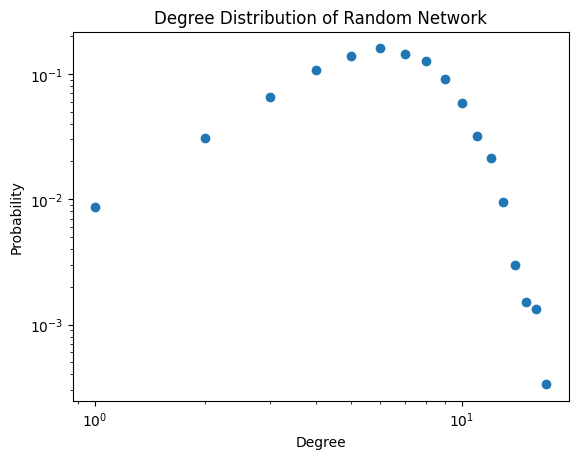

In [17]:
# Get the degree distribution of the graph
degree_sequence = sorted([d for n, d in erdos.degree()], reverse=True)
degree_count = nx.degree_histogram(erdos)

# Calculate the probability distribution function
p_k = [float(i)/sum(degree_count) for i in degree_count]

# Plot the degree distribution and the probability distribution function
plt.loglog(range(len(degree_count)), p_k, 'o')
plt.title("Degree distribution")
plt.xlabel("Degree")
plt.ylabel("Probability")
plt.title('Degree Distribution of Random Network')
plt.show()

### Q3
Determine powerlaw exponent

In [14]:
from scipy import stats

# Remove zero values from the degree count list
degree_count = [count for count in degree_count if count != 0]

# Calculate the probability distribution function
p_k = [float(i)/sum(degree_count) for i in degree_count]

# Calculate the logarithmic values
logx = np.log10(range(1, len(degree_count)+1))
logy = np.log10(p_k)

# Fit a linear regression model to the data
slope, intercept, r_value, p_value, std_err = stats.linregress(logx, logy)

# Print the slope and intercept of the line
print("Slope:", slope)
print("Intercept:", intercept)

Slope: -2.1630455359779224
Intercept: 0.09320597877177628


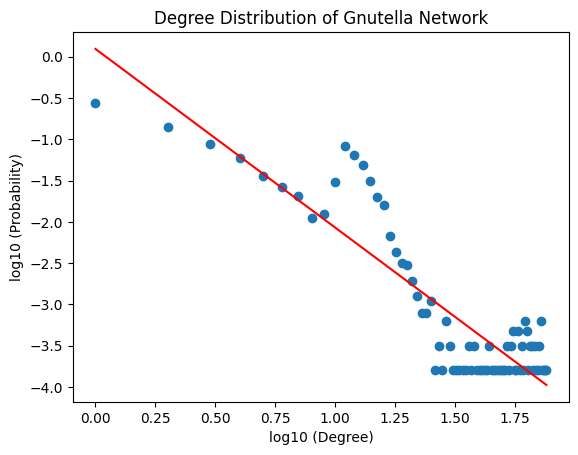

Gama değeri  -2.1630455359779224  olarak bulunmuştur.


In [17]:
x = logx
y = logy

def line_func(x):
    return slope * x + intercept

# Create a plot of the data points and the line
plt.scatter(x, y)
plt.plot(x, line_func(x), color='red')
plt.xlabel('log10 (Degree)')
plt.ylabel('log10 (Probability)')
plt.title('Degree Distribution of Gnutella Network')
plt.show()

print("Gama değeri ", slope, " olarak bulunmuştur.")

### Q4
Find distance distribution of gnutella network.

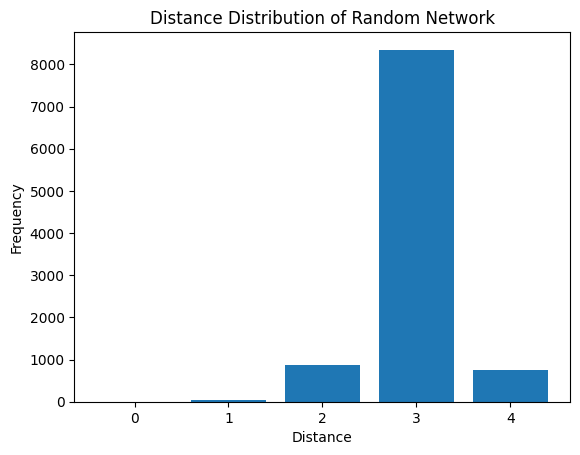

In [35]:
# calculate the shortest path lengths between all pairs of nodes
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(erdos))
# get the distance distribution
distances = []
for source, targets in shortest_path_lengths.items():
    for target, distance in targets.items():
        if source != target:
            distances.append(distance)
distance_distribution = np.histogram(distances, bins=range(max(distances)+2))[0] / float(nx.number_of_nodes(erdos))

# plot the distance distribution
plt.bar(range(len(distance_distribution)), distance_distribution)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distance Distribution of Random Network')
plt.show()

In [19]:
#burayı yeni ekledim slayta ekleyemedim. Şu an çıktı alamadım. İyileştirmeler yapıp çıktı alınabilir. Try it!
import collections
# Calculate the shortest path lengths between all pairs of nodes
distances = nx.shortest_path_length(gnutella_graph)

# Count the number of pairs with each distance
dist_counts = collections.Counter()
for source in distances:
    for target, dist in distances[source].items():
        dist_counts[dist] += 1

# Normalize the distance count list to get the distance distribution
n = len(gnutella_graph.nodes)
p_dist = [float(count) / (n * (n - 1)) for count in dist_counts.values()]

# Create a log-log plot of the distance distribution
plt.loglog(list(dist_counts.keys()), p_dist, 'bo', basex=10, basey=10)
plt.xlabel('Distance')
plt.ylabel('p(d)')
plt.title('Distance Distribution')
plt.show()

TypeError: list indices must be integers or slices, not tuple

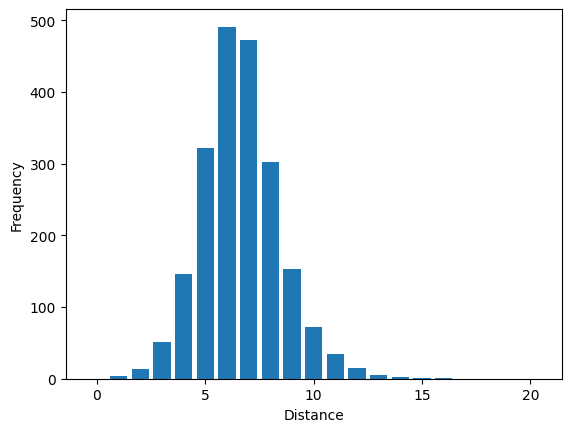

In [15]:
# calculate the shortest path lengths between all pairs of nodes
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(gnutella_graph))
# get the distance distribution
distances = []
for source, targets in shortest_path_lengths.items():
    for target, distance in targets.items():
        if source != target:
            distances.append(distance)
distance_distribution = np.histogram(distances, bins=range(max(distances)+2))[0] / float(nx.number_of_nodes(gnutella_graph))

# plot the distance distribution
plt.bar(range(len(distance_distribution)), distance_distribution)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

### Q5
Determine the average and maximum distance of gnutella network

In [18]:
import statistics
from itertools import chain
# This includes the isolated node!
path_lengths = (x.values() for x in dict(nx.all_pairs_shortest_path_length(gnutella_graph)).values())
print("The average distance of gnutella network is : ", statistics.mean(chain.from_iterable(path_lengths)))

The average distance of gnutella network is :  6.629006992371095


In [39]:
print("The diameter (maximum distance) of gnutella network is: ", max(distances))

The diameter (maximum distance) of gnutella network is:  4


In [40]:
# Find the diameter of the graph
diameter = nx.diameter(gnutella_graph)

print("The diameter of the graph is:", diameter)

NetworkXError: Found infinite path length because the digraph is not strongly connected

### Q6
Determine distance distribution of a random (erdos) network.

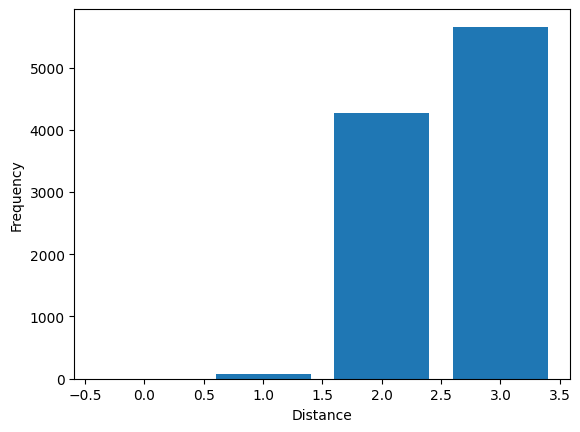

In [44]:
# calculate the shortest path lengths between all pairs of nodes
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(erdos))
# get the distance distribution
distances = []
for source, targets in shortest_path_lengths.items():
    for target, distance in targets.items():
        if source != target:
            distances.append(distance)
distance_distribution = np.histogram(distances, bins=range(max(distances)+2))[0] / float(nx.number_of_nodes(erdos))

# plot the distance distribution
plt.bar(range(len(distance_distribution)), distance_distribution)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

In [36]:
# Find the average shortest path length
avg_shortest_path_length = nx.average_shortest_path_length(erdos)

# Print the average shortest path length
print(f"Average shortest path length: {avg_shortest_path_length}")

Average shortest path length: 2.983732933293329


In [37]:
diameter = nx.diameter(erdos)

# Print the diameter
print(f"Diameter: {diameter}")

Diameter: 4


### Q7
Determine whether gnutella network is small world or ultra small world. 

<img src="small_world.png" alt="Small World" style="width: 500px; height: 300px;">